## 反向转播算法

### 1. 导入相关的包

In [1]:
from data_structure import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### 2. 数据集制作部分

In [2]:
# 导入数据集
file_path = "./data/iris.csv"
data_pd = pd.read_csv(file_path, header=None)
# 除去标签
data_x = data_pd[[0, 1, 2, 3]].values
#标签
label_str = data_pd[4].values
map_label_to_int = {'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2}
# 转换成数值
label = []
for item in label_str:
    label.append(map_label_to_int[item])
label = np.array(label)
# 数据集 （x 数据, y 标签）
data_set = np.hstack((data_x, label.reshape(150, 1)))
data_set_list = data_set.tolist()
# 打乱
random.shuffle(data_set_list)
data_set = np.array(data_set_list)

# 训练集
x_train = data_set[:130, :-1]
label_train = data_set[:130, -1]
# 独热编码
y_train = np.zeros([130, 3])
for i, label in enumerate(label_train):
    y_train[i][int(label)] = 1
y_train

# 验证集
x_vali = data_set[130:, :-1]
label_vali = data_set[130:, -1]

data_pd.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. 参数设置

In [3]:
# 学习率
lr_rate = 0.04
# 每层网络神经元数量
nn_list = [4, 5, 3]

### 4. 神经网络模型

In [4]:
model = NeuralNetwork(nn_list)
acc = []
acc.append(model.validation(x_vali, label_vali))
# 每一次训练验证一下
for i in range(500):
    model.train(1, x_train, y_train, lr_rate)
    acc.append(model.validation(x_vali, label_vali))

### 5. 画出acc曲线

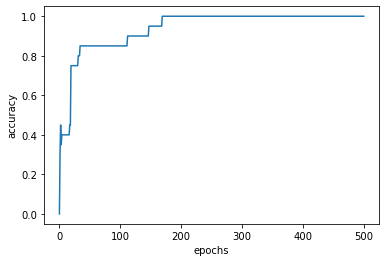

In [5]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.show()